## Surface spatial distribution

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
from copy import copy
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import math
import cmocean

In [3]:
datadir = '/data/oceanparcels/output_data/data_Reint/'

In [4]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [5]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [6]:
region = ['EqPac','NPSG', 'SO']
mortality = 0.39              # [d-1]
runtime = 730                 # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
biofouling = 'NEMO_detritus'
grazing = 'full'
mixing = 'markov_0_KPP_reflect'+biofouling+'_tidal'
death = 'NEMO+detritus' #,'NEMO losses', 'sudden death'
diss = 0.006
rho_bf = 1388
rho_fr = 1800
sizebinedges = [1e-3, 1e-4, 1e-5]
res ='1x1'
proc = 'bfnoadv'
season = 'DJF'
season_string = {'Jan':'January - July', 'MAM':'March - September', 'JJA':'June - December', 'SON':'September - March','DJF':'December - June'}

In [7]:
ds_0 = xr.open_dataset(datadir+'regional_'+region[0]+'_'+proc+'_'+season+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region[1]+'_'+proc+'_'+season+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region[2]+'_'+proc+'_'+season+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [8]:
dslist = [ds_0, ds_1, ds_2]

In [9]:
number_of_trajectories_to_plot = 33
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 33 of 10000 trajectories
plotting every 303 particles


In [10]:
mld_0 = np.mean(np.divide(ds_0['z'],ds_0['mld']),axis=0)
ez_0 = np.mean(ds_0['euphz'][:,1:],axis=0)
ez_0 = np.concatenate(([ez_0[0]],ez_0))

mld_1 = np.mean(np.divide(ds_1['z'],ds_1['mld']),axis=0)
ez_1 = np.mean(ds_1['euphz'][:,1:],axis=0)
ez_1 = np.concatenate(([ez_1[0]],ez_1))

mld_2 = np.mean(np.divide(ds_2['z'],ds_2['mld']),axis=0)
ez_2 = np.mean(ds_2['euphz'][:,1:],axis=0)
ez_2 = np.concatenate(([ez_2[0]],ez_2))

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


In [11]:
mldlist = [mld_0, mld_1, mld_2]
ezlist = [ez_0, ez_1, ez_2]

In [12]:
# obs_ids=[1051-731,1051]
obs_ids=[174,174+731]

In [13]:
for ds in dslist:
    ds['days'] = (['traj','obs'],(ds['time'][:,:].T.values-ds['time'][:,obs_ids[0]].T.values).T.astype(np.float64)/86400/1e9)

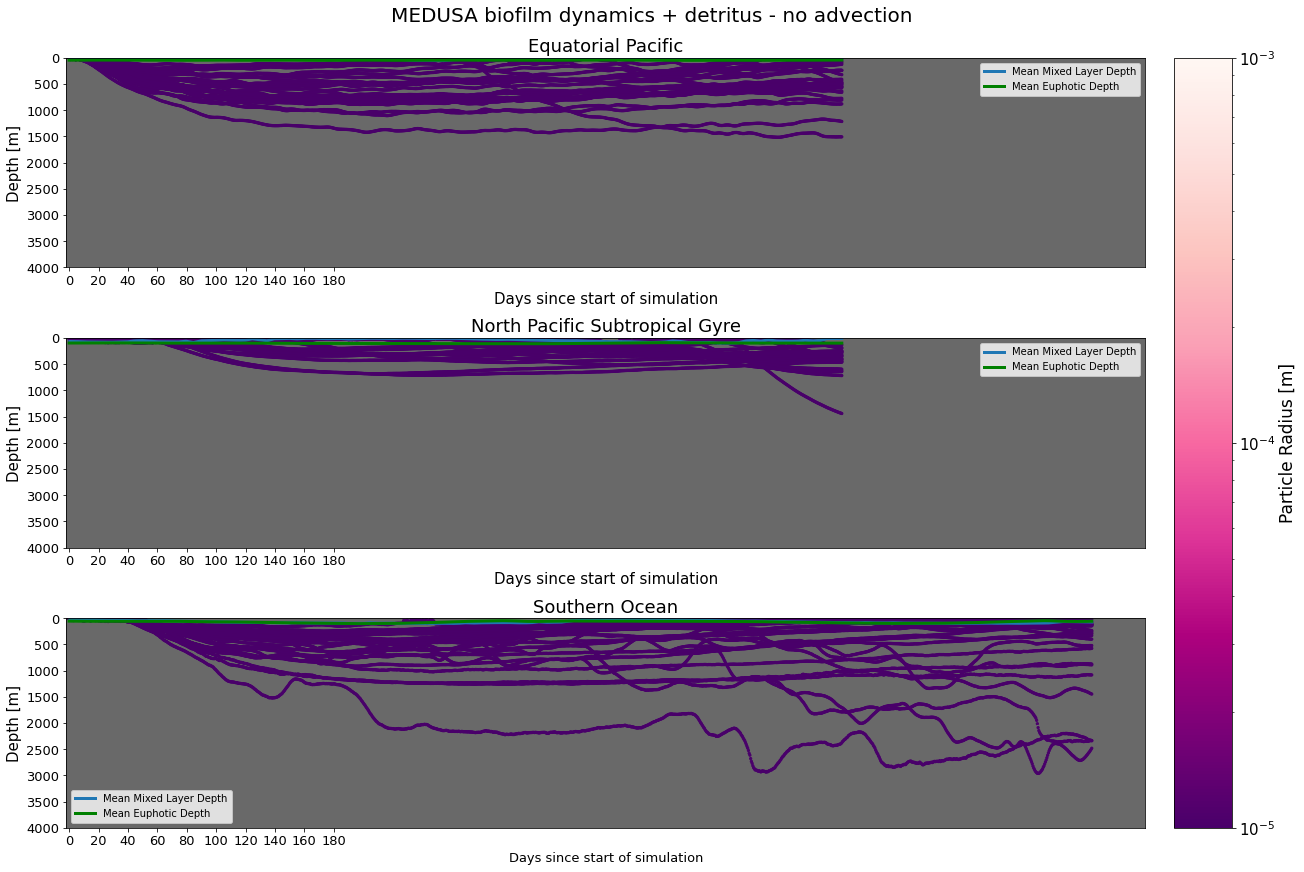

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(18,12), constrained_layout=True)
fig.suptitle('MEDUSA biofilm dynamics + detritus - no advection', fontsize=20)

sc = axs[0].scatter(ds_0['days'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = axs[0].plot(ds_0['days'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[0].plot(ds_0['days'][0,:], mld_0, linewidth=3, label='Mean Mixed Layer Depth')
axs[0].plot(ds_0['days'][0,:], ez_0, linewidth=3, c='green', label='Mean Euphotic Depth')
axs[0].set_title(regions[region[0]], fontsize=18)
axs[0].set_ylabel('Depth [m]', fontsize=15)
axs[0].set_xlabel('Days since start of simulation', fontsize=15)
axs[0].tick_params(axis='both', labelsize=13)
axs[0].set_facecolor('dimgray')
axs[0].set_ylim(4000,0)
axs[0].set_xlim(-2,732)
axs[0].set_xticks([0,20,40,60,80,100,120,140,160,180])
axs[0].legend()

sc = axs[1].scatter(ds_1['days'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = axs[1].plot(ds_1['days'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[1].plot(ds_1['days'][0,:], mld_1, linewidth=3, label='Mean Mixed Layer Depth')
axs[1].plot(ds_1['days'][0,:], ez_1, linewidth=3, c='green', label='Mean Euphotic Depth')
axs[1].set_title(regions[region[1]], fontsize=18)
axs[1].set_ylabel('Depth [m]', fontsize=15)
axs[1].set_xlabel('Days since start of simulation', fontsize=15)
axs[1].tick_params(axis='both', labelsize=13)
axs[1].set_facecolor('dimgray')
axs[1].set_ylim(4000,0)
axs[1].set_xlim(-2,732)
axs[1].set_xticks([0,20,40,60,80,100,120,140,160,180])
axs[1].legend()

sc = axs[2].scatter(ds_2['days'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = axs[2].plot(ds_2['days'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[2].plot(ds_2['days'][0,:], mld_2, linewidth=3, label='Mean Mixed Layer Depth')
axs[2].plot(ds_2['days'][0,:], ez_2, linewidth=3, c='green', label='Mean Euphotic Depth')
axs[2].set_title(regions[region[2]], fontsize=18)
axs[2].set_ylabel('Depth [m]', fontsize=15)
axs[2].set_xlabel('Days since start of simulation', fontsize=13)
axs[2].tick_params(axis='both', labelsize=13)
axs[2].set_facecolor('dimgray')
axs[2].set_ylim(4000,0)
axs[2].set_xlim(-2,732)
axs[2].set_xticks([0,20,40,60,80,100,120,140,160,180])
axs[2].legend()

cb = fig.colorbar(sc, ax=axs)
cb.set_label('Particle Radius [m]', fontsize=17)
cb.ax.tick_params(labelsize=15)
plt.show()

In [14]:
split_ds_0 = list(ds_0.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_2 = list(ds_2.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_dslist = [split_ds_0, split_ds_1,split_ds_2]

In [17]:
# depthbins = np.linspace(0,3500,200)
depthbins = np.concatenate((np.linspace(0,250,51), np.linspace(350,4500,84)))
sub_depths = [[0,51],[51,len(depthbins)]]
# starttimes=(ds_2['time'][0,:]-np.timedelta64(int(outputdt/2.), 'h')).values
# endtime = (ds_2['time'][0,-1]+np.timedelta64(int(outputdt/2.), 'h')).values
starttimes=(ds_2['time'][0,obs_ids[0]:obs_ids[1]]-np.timedelta64(int(outputdt/2.), 'h')).values
endtime = (ds_2['time'][0,obs_ids[1]]+np.timedelta64(int(outputdt/2.), 'h')).values
timebins = np.append(starttimes,endtime)
daybins =(timebins-timebins[0]).astype(np.float64)*(np.timedelta64(1,'ns') / np.timedelta64(1,'D'))
timeperiod = 731

In [68]:
# depth_densities = np.zeros((len(dslist),len(split_ds_2),len(dslist[2]['obs']),len(depthbins)-1))
# depth_numbers = np.zeros((len(dslist),len(split_ds_2),len(dslist[2]['obs']),len(depthbins)-1))
depth_densities = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))
depth_numbers = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))

for k in range(len(dslist)):
    split_ds = split_dslist[k]
    for i in range(len(depth_densities[0])):
        for j in range(timeperiod):
            values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=obs_ids[0]+j), depthbins)
#             depth_densities[k,i,j] = values/len(split_ds[i][1]['traj'])
            depth_numbers[k,i,j] = values/np.diff(depthbins)

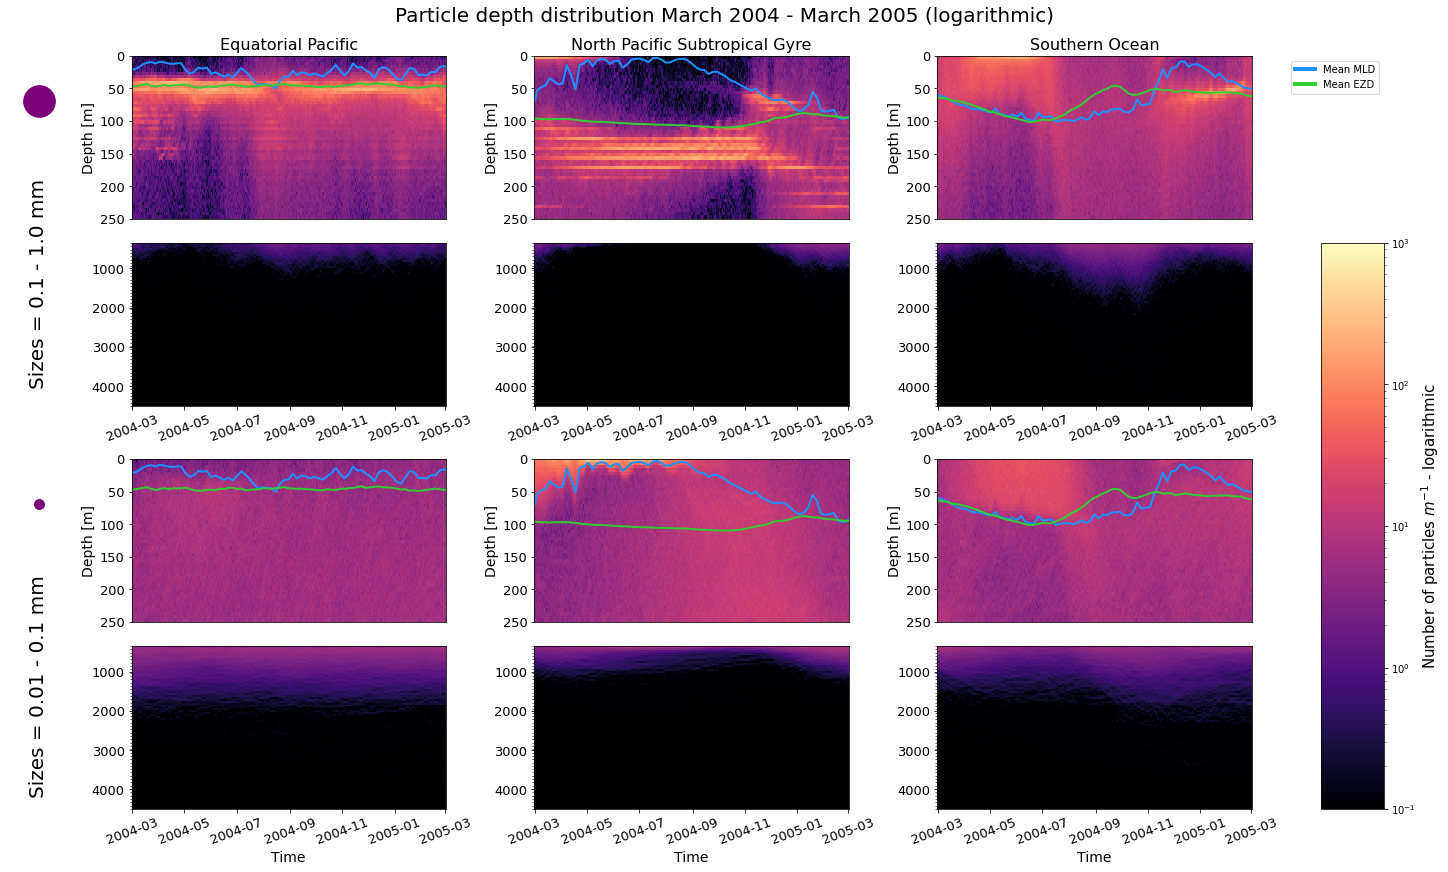

In [87]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[1:, 4])
ax16 = fig.add_subplot(gs[0, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]

for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            ax.tick_params(axis='both', labelsize=13)
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_numbers[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1e3))
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                ax.tick_params(axis='x', rotation=20)
#                 ax.set_ylabel('Depth [m]', fontsize=14)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=14)
         
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('Number of particles $m^{-1}$ - logarithmic', size=15)
fig.suptitle('Particle depth distribution March 2004 - March 2005 (logarithmic)', fontsize=20)
# fig.suptitle('Particle depth distribution '+season_string[season]+' (logarithmic)', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax16.axis('off')
ax16.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right')

In [90]:
# Lobelle_bins = np.linspace(0,300,100)
Lobelle_bins = np.concatenate((np.linspace(0,250,51), np.linspace(350,4500,84)))
sub_depths = [[0,51],[51,len(Lobelle_bins)]]
# starttimes=(ds_2['time'][0,:]-np.timedelta64(int(outputdt/2.), 'h')).values
# endtime = (ds_2['time'][0,-1]+np.timedelta64(int(outputdt/2.), 'h')).values
# timebins = np.append(starttimes,endtime)
# daybins =(timebins-timebins[0]).astype(np.float64)*(np.timedelta64(1,'ns') / np.timedelta64(1,'D'))

depth_Lobelle = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(Lobelle_bins)-1))

In [91]:
for h in range(len(dslist)):
    print(h)
    for k in range(len(split_ds_0)):
        for i in range(timeperiod):
            for j in range(len(Lobelle_bins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>Lobelle_bins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<Lobelle_bins[j+1])
                vs0 = split_dslist[h][k][1]['vs_init'][:,obs_ids[0]+i].values[trajs0]
                w_m0 = split_dslist[h][k][1]['w_m'][:,obs_ids[0]+i].values[trajs0]
                w_adv0 = split_dslist[h][k][1]['w_adv'][:,obs_ids[0]+i].values[trajs0]
                w_m_b0 = split_dslist[h][k][1]['w_m_b'][:,obs_ids[0]+i].values[trajs0]
                depth_Lobelle[h,k,i,j] = np.mean(np.divide(np.abs(vs0),np.abs(w_m0+w_adv0+w_m_b0)))
        
#         trajs1 = np.logical_and(ds_2['z'][:,i].values>Lobelle_bins[j],ds_2['z'][:,i].values<Lobelle_bins[j+1])
#         vs1 = ds_2['vs_init'][:,i].values[trajs1]
#         w_m1 = ds_2['w_m'][:,i].values[trajs1]
#         w_adv1 = ds_2['w_adv'][:,i].values[trajs1]
#         w_m_b1 = ds_2['w_m_b'][:,i].values[trajs1]
#         depth_Lobelle[1,i,j] = np.mean(np.divide(np.abs(vs1),np.abs(w_m1+w_adv1+w_m_b1)))

0
1
2


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# np.save('Lobelle', depth_Lobelle)

In [18]:
Lobelle_cmap = copy(plt.get_cmap('cmo.curl'))

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

Lobelle_cmap = truncate_colormap(Lobelle_cmap, 0.1, 0.9)

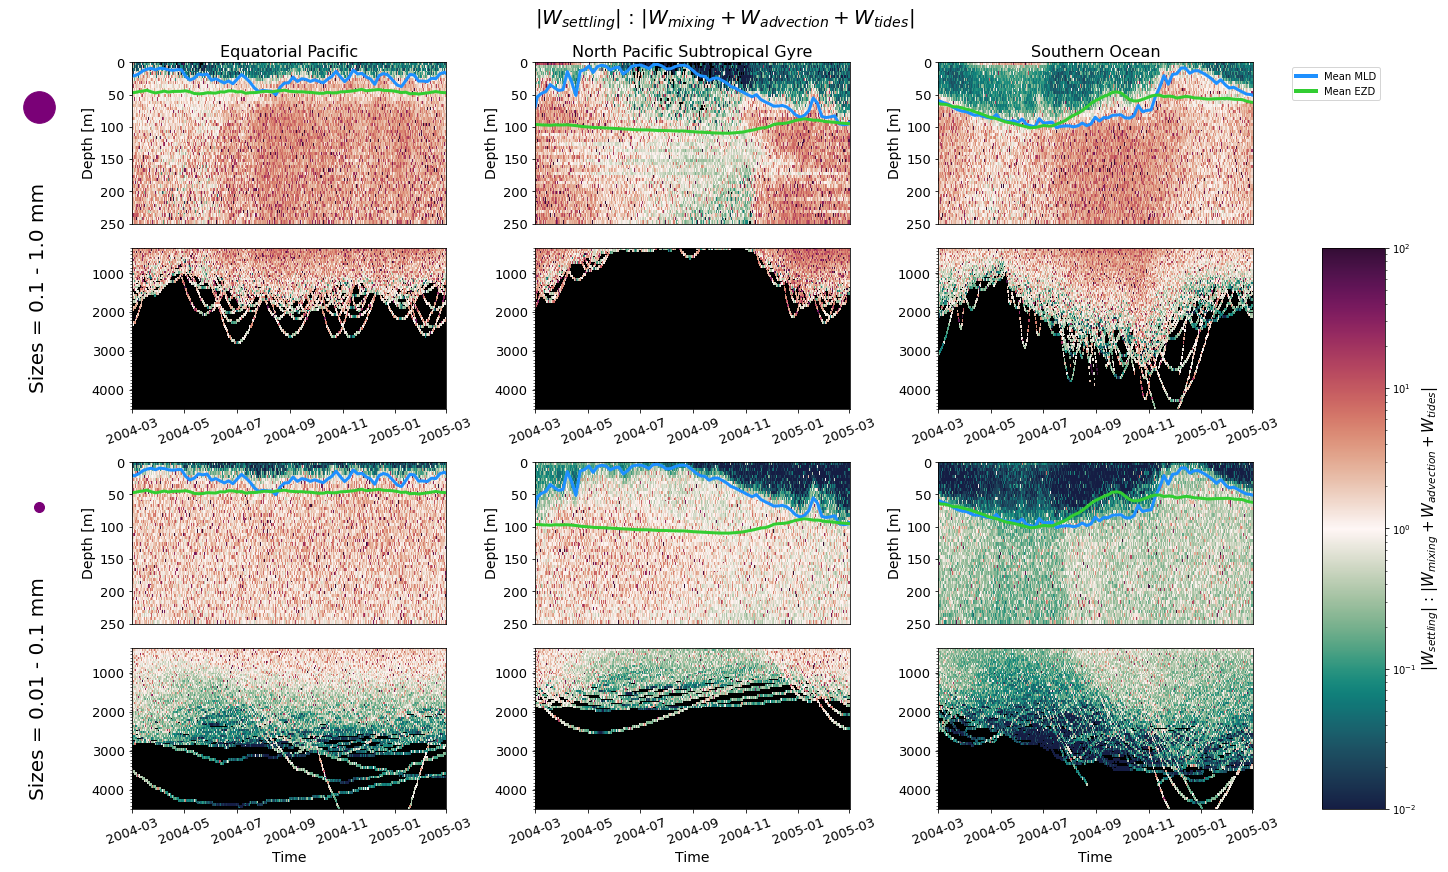

In [96]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[1:, 4])
ax16 = fig.add_subplot(gs[0, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,Lobelle_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Lobelle[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl',norm=mcolors.LogNorm(vmin=1e-2, vmax=1e2))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='limegreen', label='Mean Euphotic Depth')
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Lobelle_bins[sub_depths[j][1]-1], Lobelle_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Lobelle_bins[sub_depths[j][1]-1], Lobelle_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                ax.tick_params(axis='x', rotation=20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('$|W_{settling}|$ : $|W_{mixing}+W_{advection}|$', size=15)
fig.suptitle('$|W_{settling}|$ : $|W_{mixing}+W_{advection}|$', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax16.axis('off')
ax16.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right')

In [19]:
Fischer_bins = np.concatenate((np.linspace(0,250,51), np.linspace(350,4500,84)))
depth_Fischer = np.zeros((len(dslist),len(split_ds_0),timeperiod,len(Fischer_bins)-1))

In [20]:
for h in range(len(dslist)):
    print(h)
    for k in range(len(split_ds_0)):
        for i in range(timeperiod):
            for j in range(len(Fischer_bins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>Fischer_bins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<Fischer_bins[j+1])
                growth = split_dslist[h][k][1]['a_growth'][:,obs_ids[0]+i].values[trajs0]
                coll = split_dslist[h][k][1]['a_coll'][:,obs_ids[0]+i].values[trajs0]
                grazing = split_dslist[h][k][1]['a_gr'][:,obs_ids[0]+i].values[trajs0]
                lin = split_dslist[h][k][1]['a_l'][:,obs_ids[0]+i].values[trajs0]
                nonlin = split_dslist[h][k][1]['a_nl'][:,obs_ids[0]+i].values[trajs0]
                depth_Fischer[h,k,i,j] = np.mean(growth+coll-grazing-lin-nonlin)

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


1
2


In [37]:
# Fischer = np.load('Fischer.npy')

In [ ]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[1:, 4])
ax16 = fig.add_subplot(gs[0, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,Fischer_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Fischer[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl', vmin=-1e5, vmax=1e5)#,norm=mcolors.SymLogNorm(linthresh=1e3, base=10, vmin=-1e6, vmax=1e6))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='limegreen', label='Mean Euphotic Depth')
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Fischer_bins[sub_depths[j][1]-1], Fischer_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Fischer_bins[sub_depths[j][1]-1], Fischer_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                ax.tick_params(axis='x', rotation=20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15) #, ticks=[-1e5, -5e4, 0, 5e4, 1e5])
# cb.ax.set_yticklabels(['-1e5', '-5e4', '0', '5e4', '1e5'])
cb.set_label('$Growth + Collisions - Grazing - Linear - Nonlinear~[no. m^{-2} s^{-1}]$', size=15, rotation=-90, labelpad=30)
fig.suptitle(' $Growth + Collisions - Grazing - Linear - Nonlinear~[no. m^{-2} s^{-1}]$', fontsize=20)

for k, ds_r in enumerate(split_ds_0):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax16.axis('off')
ax16.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right')

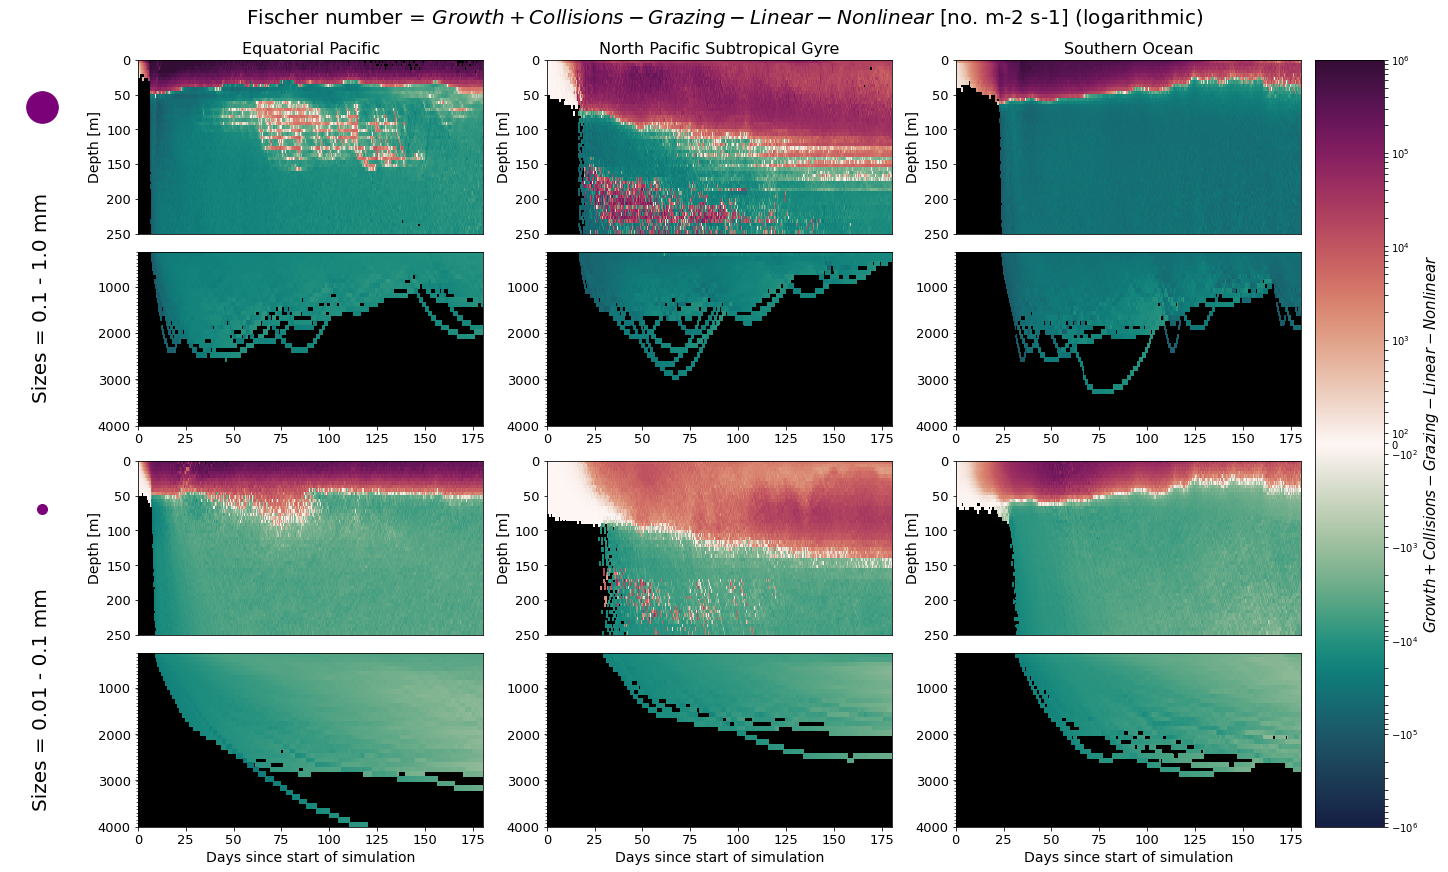

In [25]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[:, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(daybins,Fischer_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Fischer[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl',norm=mcolors.SymLogNorm(linthresh=1e3, base=10, vmin=-1e6, vmax=1e6))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Fischer_bins[sub_depths[j][1]-1], Fischer_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Fischer_bins[sub_depths[j][1]-1], Fischer_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                if c == 1:
                    ax.set_xlabel('Days since start of simulation', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('$Growth + Collisions - Grazing - Linear - Nonlinear$', size=15)
fig.suptitle('Fischer number = $Growth + Collisions - Grazing - Linear - Nonlinear$ [no. m-2 s-1] (logarithmic)', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')

In [27]:
Dominant_bins = np.concatenate((np.linspace(0,250,51), np.linspace(350,4500,84)))
depth_Dominant = np.ones((len(dslist),len(split_ds_2),timeperiod,len(Dominant_bins)-1))*-1

In [28]:
for h in range(len(dslist)):
    print(h)
    for k in range(len(split_ds_0)):
        for i in range(timeperiod):
            for j in range(len(Dominant_bins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>Dominant_bins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<Dominant_bins[j+1])
                growth = split_dslist[h][k][1]['a_growth'][:,obs_ids[0]+i].values[trajs0]
                coll = split_dslist[h][k][1]['a_coll'][:,obs_ids[0]+i].values[trajs0]
                grazing = split_dslist[h][k][1]['a_gr'][:,obs_ids[0]+i].values[trajs0]
                lin = split_dslist[h][k][1]['a_l'][:,obs_ids[0]+i].values[trajs0]
                nonlin = split_dslist[h][k][1]['a_nl'][:,obs_ids[0]+i].values[trajs0]
                terms = np.array([np.mean(growth),np.mean(coll),np.mean(grazing),np.mean(lin),np.mean(nonlin)])
                if np.nanmax(terms)>0:
                    depth_Dominant[h,k,i,j] = np.argmax(terms)
                

0


/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: All-NaN slice encountered
  del sys.path[0]


1
2


In [29]:
Dominant_cmap = copy(plt.get_cmap('Paired',5))
Dominant_cmap.set_under('k')

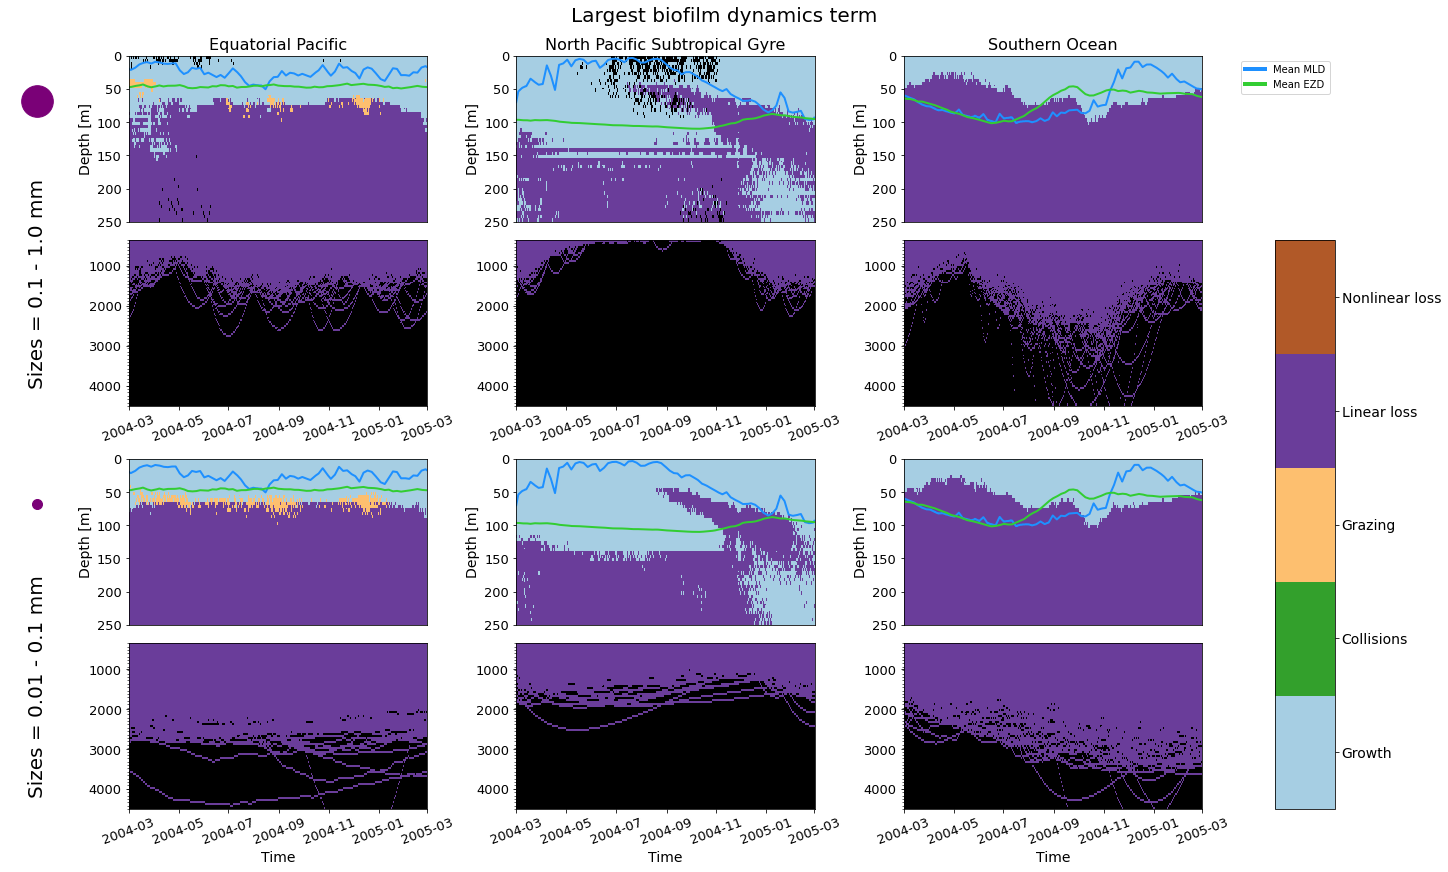

In [31]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[1:, 4])
ax16 = fig.add_subplot(gs[0, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,Dominant_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Dominant[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=Dominant_cmap,vmin=-0.5,vmax=4.5)#,norm=mcolors.LogNorm(vmin=1e-4, vmax=1e4))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='limegreen', label='Mean Euphotic Depth')
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Dominant_bins[sub_depths[j][1]-1], Dominant_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Dominant_bins[sub_depths[j][1]-1], Dominant_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                ax.tick_params(axis='x', rotation=20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15, ticks=[0,1,2,3,4])
# cb.set_label('$Growth$ - $Collisions$', size=15)
cb.ax.set_yticklabels(['Growth','Collisions','Grazing','Linear loss','Nonlinear loss'],fontsize=14)
fig.suptitle('Largest biofilm dynamics term', fontsize=20)

for k, ds_r in enumerate(split_ds_0):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax16.axis('off')
ax16.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right')

In [26]:
# np.save('Fischer',depth_Fischer)

In [27]:
Sebille_bins = np.concatenate((np.linspace(0,250,51), np.linspace(250,4000,39)))
depth_Sebille = np.zeros((len(dslist),len(split_ds_0),len(dslist[0]['obs']),len(Sebille_bins)-1))

In [ ]:
for h in range(len(dslist)):
    print(h)
    for k in range(len(split_ds_0)):
        for i in range(len(ds_0['obs'])):
            for j in range(len(Sebille_bins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,i].values>Sebille_bins[j],split_dslist[h][k][1]['z'][:,i].values<Sebille_bins[j+1])
                growth = split_dslist[h][k][1]['a_growth'][:,i].values[trajs0]
                coll = split_dslist[h][k][1]['a_coll'][:,i].values[trajs0]
                depth_Sebille[h,k,i,j] = np.mean(growth-coll)

0
1


In [ ]:
# np.save('Sebille',depth_Sebille)

In [ ]:
# depth_Sebille = np.load('Sebille.npy')

In [ ]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[:, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(daybins,Sebille_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Sebille[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl',vmin=-1e3,vmax=1e3)#,norm=mcolors.LogNorm(vmin=1e-4, vmax=1e4))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Sebille_bins[sub_depths[j][1]-1], Sebille_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Sebille_bins[sub_depths[j][1]-1], Sebille_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                if c == 1:
                    ax.set_xlabel('Days since start of simulation', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('$Growth$ - $Collisions$', size=15)
fig.suptitle('Sebille number = $Growth$ - $Collisions$', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')

In [ ]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[:, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(daybins,Sebille_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Sebille[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl',norm=mcolors.SymLogNorm(linthresh=1e1,vmin=-1e3, vmax=1e3))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Sebille_bins[sub_depths[j][1]-1], Sebille_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Sebille_bins[sub_depths[j][1]-1], Sebille_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                if c == 1:
                    ax.set_xlabel('Days since start of simulation', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('$Growth$ - $Collisions$', size=15)
fig.suptitle('Sebille number = $Growth$ - $Collisions$', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')

In [ ]:
Onink_bins = np.concatenate((np.linspace(0,250,51), np.linspace(250,4000,39)))
depth_Onink = np.zeros((len(dslist),len(split_ds_0),len(dslist[0]['obs']),len(Onink_bins)-1))

In [ ]:
for h in range(len(dslist)):
    print(h)
    for k in range(len(split_ds_0)):
        for i in range(len(ds_0['obs'])):
            for j in range(len(Onink_bins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,i].values>Onink_bins[j],split_dslist[h][k][1]['z'][:,i].values<Onink_bins[j+1])
                grazing = split_dslist[h][k][1]['a_gr'][:,i].values[trajs0]
                lin = split_dslist[h][k][1]['a_l'][:,i].values[trajs0]
                depth_Onink[h,k,i,j] = np.mean(grazing-lin)

In [ ]:
# np.save('Onink',depth_Onink)

In [ ]:
# depth_Onink = np.load('Onink.npy')

In [ ]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[:, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(daybins,Onink_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Onink[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl',vmin=-1e5,vmax=1e5)#,norm=mcolors.LogNorm(vmin=1e-4, vmax=1e4))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Onink_bins[sub_depths[j][1]-1], Onink_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Onink_bins[sub_depths[j][1]-1], Onink_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                if c == 1:
                    ax.set_xlabel('Days since start of simulation', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('$Grazing$ - $Linear$ $loss$', size=15)
fig.suptitle('Onink number = $Grazing$ - $Linear$ $loss$', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')

In [ ]:
fig = plt.figure(figsize=(20,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=4, width_ratios=[0.2,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2:, 0])

ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 1])

ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 2])

ax11 = fig.add_subplot(gs[0, 3])
ax12 = fig.add_subplot(gs[1, 3])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[3, 3])

ax15 = fig.add_subplot(gs[:, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(daybins,Onink_bins[sub_depths[j][0]:sub_depths[j][1]],depth_Onink[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap='cmo.curl',norm=mcolors.SymLogNorm(linthresh=1e2,vmin=-1e5, vmax=1e5))
            ax.tick_params(axis='both', labelsize=13)
            if j == 0:
                ax.set_ylabel('Depth [m]', fontsize=14)
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                ax.set_ylim(Onink_bins[sub_depths[j][1]-1], Onink_bins[sub_depths[j][0]])
                if c == 0:
                    ax.set_title(regions[region[i]], fontsize=16)
            if j == 1:
                ax.set_ylim(Onink_bins[sub_depths[j][1]-1], Onink_bins[sub_depths[j][0]])
                ax.set_yticks(np.linspace(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],50),minor=True)
                if c == 1:
                    ax.set_xlabel('Days since start of simulation', fontsize=14)
        
cb = fig.colorbar(pc, cax=ax15)
cb.set_label('$Grazing$ - $Linear$ $loss$', size=15)
fig.suptitle('Onink number = $Grazing$ - $Linear$ $loss$', fontsize=20)

for k, ds_r in enumerate(split_ds):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')

In [ ]:
# w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
# w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
# w_list = ['w_m', 'vs_init', 'w_adv', 'w_m_b']
# w_list_names = ['KPP Wind mixing', 'Potential settling velocity', 'Model advection',  'Tidal mixing']
# w_pdf = np.zeros((len(dslist),len(w_list),len(w_bins)-1))
# linestyles=['-','-.']

# for i,ds in enumerate(dslist):
#     for j,w in enumerate(w_list):
#         vals, bins = np.histogram(ds[w], w_bins)
#         w_pdf[i,j,:] = vals/ds[w].size

In [ ]:
# w_widths = np.ones(w_pdf.shape[2])
# w_centers = np.arange(w_pdf.shape[2])
# w_edges = np.arange(w_pdf.shape[2]+1)-0.5
# w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

In [ ]:
# w_pdf_sizes = np.zeros((len(dslist),len(w_list),len(sizebinedges)-1,len(w_bins)-1))

# for i,ds in enumerate(dslist):
#     split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
#     for j,w in enumerate(w_list):
#         for k,ds_r in enumerate(split_ds):
#             vals, bins = np.histogram(ds_r[1][w], w_bins)
#             w_pdf_sizes[i,j,k,:] = vals/ds_r[1][w].size

In [ ]:
# fig = plt.figure(figsize=(20,10),constrained_layout=True)
# fig.suptitle('Vertical velocities', fontsize=24, y=1.03)
# gs = gridspec.GridSpec(ncols=4, nrows=2, width_ratios=[1,1,1,0.3],figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])
# ax3 = fig.add_subplot(gs[0, 1])
# ax4 = fig.add_subplot(gs[1, 1])
# ax5 = fig.add_subplot(gs[0, 2])
# ax6 = fig.add_subplot(gs[1, 2])
# ax9 = fig.add_subplot(gs[0, 3])
# ax10 = fig.add_subplot(gs[1, 3])
# axes = [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax9, ax10]]

# for i,ds in enumerate(dslist):
#     split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
#     for k, ds_r in enumerate(split_ds):
#         for j,w in enumerate(w_list):
#             axes[i][k].barh(w_centers, w_pdf_sizes[i,j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w_list_names[j])
#         axes[i][k].set_xlim(0,1.)
#         axes[i][k].set_yticks(w_edges)
#         axes[i][k].set_yticklabels(w_bin_str)
#         axes[i][k].invert_yaxis()
#         axes[i][k].tick_params(axis='both', labelsize=16)
#         axes[i][k].set_xlabel('Fraction of observations', fontsize=18)
#         axes[i][k].set_ylabel('Vertical velocity [m/s]', fontsize=18)
#     axes[i][0].set_title(regions[region[i]], fontsize=16)
    
# split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
# for k, ds_r in enumerate(split_ds):
#     axes[3][k].scatter(0.5,0.87,s=sizebinedges[-k-1]*1000000,color=r_pl_clist[0])
#     axes[3][k].set_ylim(0,1)
#     axes[3][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
#     axes[3][k].axis('off')
# axes[0][0].legend(fontsize=16, bbox_to_anchor=(-0.31, 1))

In [ ]:

# fifth_d_phy = np.nanpercentile(ds_0['d_phy'], 5)
# ninetyfifth_d_phy = np.nanpercentile(ds_0['d_phy'], 95)
# # ax.plot([fifth_d_phy,ninetyfifth_d_phy], [np.mean(ds_0['tpp3']),np.mean(ds_0['tpp3'])], color='k')
# # ax.scatter([fifth_d_phy,ninetyfifth_d_phy],[np.mean(ds_0['tpp3']),np.mean(ds_0['tpp3'])],marker='|', color='k')
# print(fifth_d_phy)
# print(ninetyfifth_d_phy)

In [ ]:
# fig = plt.figure(figsize=(10,10))
# ax=plt.axes()

# for i, ds in enumerate(dslist):
#     ax.scatter(ds['d_phy'], ds['tpp3'], c= region_cmap[i], s=3, alpha=0.1,label=regions[region[i]],zorder=0)
    
# for i, ds in enumerate(dslist):
#     fifth_d_phy = np.nanpercentile(ds['d_phy'], 5)
#     ninetyfifth_d_phy = np.nanpercentile(ds['d_phy'], 95)
#     ax.plot([fifth_d_phy,ninetyfifth_d_phy], [np.mean(ds['tpp3']),np.mean(ds['tpp3'])], color='k',zorder=1)
#     ax.scatter([fifth_d_phy,ninetyfifth_d_phy],[np.mean(ds['tpp3']),np.mean(ds['tpp3'])],marker='|', color='k',zorder=1)
    
#     fifth_tpp3 = np.nanpercentile(ds['tpp3'], 5)
#     ninetyfifth_tpp3 = np.nanpercentile(ds['tpp3'], 95)
#     ax.plot([np.mean(ds['d_phy']),np.mean(ds['d_phy'])],[fifth_tpp3,ninetyfifth_tpp3], color='k',zorder=1)
#     ax.scatter([np.mean(ds['d_phy']),np.mean(ds['d_phy'])],[fifth_tpp3,ninetyfifth_tpp3],marker='_', color='k',zorder=1)
    
#     ax.scatter(np.mean(ds['d_phy']), np.mean(ds['tpp3']), c= region_cmap[i], marker='s',s=100, edgecolor ='k',label='mean '+regions[region[i]],zorder=2)
    
# ax.tick_params(axis='both', labelsize=13)
# ax.set_ylabel('Primary production [mmol N $m^{-3}$ $d^{-1}$]', fontsize=14)
# ax.set_xlabel('Diatom concentration [mmol N $m^{-3}$]', fontsize=14)

# custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[0]),
#                 Line2D([0], [0], marker='s', color='w', markerfacecolor=region_cmap[0], markeredgecolor='k'),
#                 Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[1]),
#                 Line2D([0], [0], marker='s', color='w', markerfacecolor=region_cmap[1], markeredgecolor='k'),
#                 Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[2]),
#                 Line2D([0], [0], marker='s', color='w', markerfacecolor=region_cmap[2], markeredgecolor='k')]

# ax.legend(custom_lines, [regions[region[0]], 'mean', regions[region[1]], 'mean', regions[region[2]], 'mean'], title='Region', loc='upper right')

In [ ]:
# r = 2e-16**(1/3)
# print(f'Diatom radius = {r} m = {np.round(r*1000000,2)} um')

In [ ]:
# fig = plt.figure(figsize=(10,10))
# ax=plt.axes()

# for i, ds in enumerate(dslist):
#     ax.scatter(ds['a_coll'], ds['a_growth'], c= region_cmap[i], s=3, alpha=0.1,label=regions[region[i]], zorder=0)
    
# for i, ds in enumerate(dslist):
#     fifth_a_coll = np.nanpercentile(ds['a_coll'], 5)
#     ninetyfifth_a_coll = np.nanpercentile(ds['a_coll'], 95)
#     ax.plot([fifth_a_coll,ninetyfifth_a_coll], [np.mean(ds['a_growth']),np.mean(ds['a_growth'])], color='k',zorder=2)
#     ax.scatter([fifth_a_coll,ninetyfifth_a_coll],[np.mean(ds['a_growth']),np.mean(ds['a_growth'])],marker='|', color='k',zorder=2)
    
#     fifth_a_growth = np.nanpercentile(ds['a_growth'], 5)
#     ninetyfifth_a_growth = np.nanpercentile(ds['a_growth'], 95)
#     ax.plot([np.mean(ds['a_coll']),np.mean(ds['a_coll'])],[fifth_a_growth,ninetyfifth_a_growth], color='k',zorder=2)
#     ax.scatter([np.mean(ds['a_coll']),np.mean(ds['a_coll'])],[fifth_a_growth,ninetyfifth_a_growth],marker='_', color='k',zorder=2)
    
#     ax.scatter(np.mean(ds['a_coll']), np.mean(ds['a_growth']), c= region_cmap[i], marker='s',s=100, edgecolor ='k',label='mean '+regions[region[i]],zorder=3)

# ax.tick_params(axis='both', labelsize=13)
# ax.set_ylabel('Growth [no. $m^{-2}$ $s^{-1}$]', fontsize=14)
# ax.set_xlabel('Collisions [no. $m^{-2}$ $s^{-1}$]', fontsize=14)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_ylim(1e-4,1e8)
# ax.set_xlim(1e-4,1e8)

# ax.plot(np.linspace(1e-4,1e8),np.linspace(1e-4,1e8),zorder=1)

# custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[0]),
#                 Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[1]),
#                 Line2D([0], [0], marker='o',  color='w', markerfacecolor=region_cmap[2])]

# ax.legend(custom_lines, [regions[region[0]], regions[region[1]], regions[region[2]]], title='Region', loc='upper left')

In [ ]:
# depth_counts = depth_densities*10000

In [ ]:
# fig = plt.figure(figsize=(15,12),constrained_layout=True)
# gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])
# ax3 = fig.add_subplot(gs[0, 1])
# ax4 = fig.add_subplot(gs[1, 1])
# ax5 = fig.add_subplot(gs[0, 2])
# ax6 = fig.add_subplot(gs[1, 2])
# axes = [[ax1, ax2],[ax3,ax4],[ax5,ax6]]

# for i, ax_r in enumerate(axes):
#     for c, ax in enumerate(ax_r):
#         ax.set_facecolor('k')
#         pc = ax.pcolormesh(timebins,depthbins,depth_counts[i,c].T, cmap='magma',norm=colors.LogNorm(vmin=1e-1, vmax=1e4))
#         #ax.set_title(mixing[0]+' mixing', fontsize=14)
#         ax.set_ylabel('Depth [m]', fontsize=14)
#         ax.tick_params(axis='both', labelsize=13)
#         ax.tick_params(axis='x', rotation=45)
#         ax.set_ylim(3500, 0)
# #         ax.invert_yaxis()
#         #cb.set_label('Fraction of particles - logarithmic', size=15)
#         ax.set_title(regions[region[i]]+' Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
        
# cb = fig.colorbar(pc) #, cax=ax3)
# cb.set_label('Number of particles - logarithmic', size=15)
# fig.suptitle('Particle depth distribution January - July (logarithmic)', fontsize=20)

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
# fig.suptitle('$\\Delta \\rho$', fontsize=22)

# for i, r in enumerate(split_ds_0):
#     ax1.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
# ax1.set_facecolor('lightgray')
# ax1.grid(b=True, axis='y')
# ax1.set_title(regions[region[0]])
# ax1.set_ylabel('$\\Delta \\rho$')
# ax1.set_xlabel('Time')
# ax1.tick_params(axis='x', rotation=45)
# ax1.set_ylim(-0.15,0.05)

# for i, r in enumerate(split_ds_1):
#     ax2.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1, c=r_pl_clist[i], alpha = 0.1)
# ax2.set_facecolor('lightgray')
# ax2.grid(b=True, axis='y')
# ax2.set_title(regions[region[1]])
# ax2.set_ylabel('$\\Delta \\rho$')
# ax2.set_xlabel('Time')
# ax2.tick_params(axis='x', rotation=45)
# ax2.set_ylim(-0.15,0.05)

# for i, r in enumerate(split_ds_2):
#     ax3.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
# ax3.set_facecolor('lightgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title(regions[region[2]])
# ax3.set_ylabel('$\\Delta \\rho$')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-0.15,0.05)

# custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
#                 Line2D([0], [0], color=r_pl_clist[1], lw=4),]

# ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
# fig.suptitle('$\\Delta \\rho$', fontsize=22)

# for i, r in enumerate(split_ds_0):
#     ax1.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
# ax1.set_facecolor('lightgray')
# ax1.grid(b=True, axis='y')
# ax1.set_title(regions[region[0]])
# ax1.set_ylabel('$\\Delta \\rho$')
# ax1.set_xlabel('Time')
# ax1.tick_params(axis='x', rotation=45)
# ax1.set_ylim(-0.11,-0.09)

# for i, r in enumerate(split_ds_1):
#     ax2.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1, c=r_pl_clist[i], alpha = 0.1)
# ax2.set_facecolor('lightgray')
# ax2.grid(b=True, axis='y')
# ax2.set_title(regions[region[1]])
# ax2.set_ylabel('$\\Delta \\rho$')
# ax2.set_xlabel('Time')
# ax2.tick_params(axis='x', rotation=45)
# ax2.set_ylim(-0.11,-0.09)

# for i, r in enumerate(split_ds_2):
#     ax3.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
# ax3.set_facecolor('lightgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title(regions[region[2]])
# ax3.set_ylabel('$\\Delta \\rho$')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-0.11,-0.09)

# custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
#                 Line2D([0], [0], color=r_pl_clist[1], lw=4),]

# ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
# fig.suptitle('Biofilm thickness', fontsize=22)

# for i, r in enumerate(split_ds_0):
#     ax1.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt])*1000, marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
# ax1.set_facecolor('lightgray')
# ax1.grid(b=True, axis='y')
# ax1.set_title(regions[region[0]])
# ax1.set_ylabel('Biofilm thickness [mm]')
# ax1.set_xlabel('Time')
# ax1.tick_params(axis='x', rotation=45)
# ax1.set_yscale('log')
# ax1.set_ylim(1e-7,5e-2)

# for i, r in enumerate(split_ds_1):
#     ax2.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt])*1000, marker='o', markersize=1, c=r_pl_clist[i], alpha = 0.1)
# ax2.set_facecolor('lightgray')
# ax2.grid(b=True, axis='y')
# ax2.set_title(regions[region[1]])
# ax2.set_ylabel('Biofilm thickness [mm]')
# ax2.set_xlabel('Time')
# ax2.tick_params(axis='x', rotation=45)
# ax2.set_yscale('log')
# ax2.set_ylim(1e-7,5e-2)

# for i, r in enumerate(split_ds_2):
#     ax3.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt])*1000, marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
# ax3.set_facecolor('lightgray')
# ax3.grid(b=True, axis='y')
# ax3.set_title(regions[region[2]])
# ax3.set_ylabel('Biofilm thickness [mm]')
# ax3.set_xlabel('Time')
# ax3.tick_params(axis='x', rotation=45)
# ax3.set_yscale('log')
# ax3.set_ylim(1e-7,5e-2)

# custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
#                 Line2D([0], [0], color=r_pl_clist[1], lw=4),]

# ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [ ]:
# ds_0

In [ ]:
# plt.scatter(ds_0['rho_w'])

In [ ]:
# fig = plt.figure(figsize=(20,13),constrained_layout=True)
# gs = gridspec.GridSpec(ncols=3, nrows=2,figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])
# # ax3 = fig.add_subplot(gs[2, 0])
# # ax4 = fig.add_subplot(gs[3, 0])
# ax5 = fig.add_subplot(gs[0, 1])
# ax6 = fig.add_subplot(gs[1, 1])
# # ax7 = fig.add_subplot(gs[2, 1])
# # ax8 = fig.add_subplot(gs[3, 1])
# ax9 = fig.add_subplot(gs[0, 2])
# ax10 = fig.add_subplot(gs[1, 2])
# # ax11 = fig.add_subplot(gs[2, 2])
# # ax12 = fig.add_subplot(gs[3, 2])
# axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10]]
# fig.suptitle('Biofilm growth', fontsize=22)

# for i,ds in enumerate(dslist):
#     split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
#     for k, ds_r in enumerate(split_ds):
#         axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_coll'].T[:,::f_plt], marker='o', markersize=3,c='#423B0B', alpha = 0.1, label='Collisions')
#         axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_growth'].T[:,::f_plt], marker='o', markersize=3,c='#248D07', alpha = 0.08, label='Growth')
#         axes[i][k].set_ylabel('Biofilm growth [no. $m^{-2}$ $s^{-1}$]', fontsize=18)
#         axes[i][k].set_xlabel('Time', fontsize=18)
#         axes[i][k].set_yscale('log')
#         axes[i][k].set_ylim(1e-1,1e4)
#         axes[i][k].tick_params(axis='x', rotation=45)
#         axes[i][k].tick_params(axis='both', labelsize=16)
#     axes[i][0].set_title(regions[region[i]], fontsize=20)

# custom_lines = [Line2D([0], [0], color='#423B0B', lw=4),
#                 Line2D([0], [0], color='#248D07', lw=4)]

# ax9.legend(custom_lines, ['Collisions', 'Growth'], title='Growth source', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(20,20),constrained_layout=True)
# gs = gridspec.GridSpec(ncols=3, nrows=4,figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])
# # ax3 = fig.add_subplot(gs[2, 0])
# # ax4 = fig.add_subplot(gs[3, 0])
# ax5 = fig.add_subplot(gs[0, 1])
# ax6 = fig.add_subplot(gs[1, 1])
# # ax7 = fig.add_subplot(gs[2, 1])
# # ax8 = fig.add_subplot(gs[3, 1])
# ax9 = fig.add_subplot(gs[0, 2])
# ax10 = fig.add_subplot(gs[1, 2])
# # ax11 = fig.add_subplot(gs[2, 2])
# # ax12 = fig.add_subplot(gs[3, 2])
# axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10]]
# fig.suptitle('Biofilm growth', fontsize=22)

# for i,ds in enumerate(dslist):
#     split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
#     for k, ds_r in enumerate(split_ds):
#         mean_coll = np.mean(ds_r[1]['a_coll'],axis=0)
#         max_coll = np.max(ds_r[1]['a_coll'],axis=0)
#         min_coll = np.min(ds_r[1]['a_coll'],axis=0)
#         mean_growth = np.mean(ds_r[1]['a_growth'],axis=0)
#         max_growth = np.max(ds_r[1]['a_growth'],axis=0)
#         min_growth = np.min(ds_r[1]['a_growth'],axis=0)
#         axes[i][k].plot(ds_r[1]['time'].T[:,0], mean_coll, marker='o', markersize=3,c='#423B0B', label='Mean Collisions')
#         axes[i][k].plot(ds_r[1]['time'].T[:,0], max_coll, c='#423B0B', linestyle='dashed',label='Max Collisions')
#         axes[i][k].plot(ds_r[1]['time'].T[:,0], min_coll, c='#423B0B', linestyle='dashed',label='Min Collisions')
#         axes[i][k].plot(ds_r[1]['time'].T[:,0], mean_growth, marker='o', markersize=3,c='#248D07', label='Growth')
#         axes[i][k].plot(ds_r[1]['time'].T[:,0], max_growth, c='#248D07', linestyle='dashed',label='Max Growth')
#         axes[i][k].plot(ds_r[1]['time'].T[:,0], min_growth, c='#248D07', linestyle='dashed',label='Min Growth')
#         axes[i][k].set_ylabel('Biofilm growth [no. $m^{-2}$ $s^{-1}$]', fontsize=18)
#         axes[i][k].set_xlabel('Time', fontsize=18)
#         axes[i][k].set_yscale('log')
#         axes[i][k].set_ylim(1e0,1e6)
#         axes[i][k].tick_params(axis='x', rotation=45)
#         axes[i][k].tick_params(axis='both', labelsize=16)
#     axes[i][0].set_title(regions[region[i]], fontsize=20)

# custom_lines = [Line2D([0], [0], color='#423B0B', lw=4),
#                 Line2D([0], [0], color='#248D07', lw=4)]

# ax9.legend(custom_lines, ['Collisions', 'Growth'], title='Growth source', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(20,20),constrained_layout=True)
# gs = gridspec.GridSpec(ncols=3, nrows=4,figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])
# ax3 = fig.add_subplot(gs[2, 0])
# ax4 = fig.add_subplot(gs[3, 0])
# ax5 = fig.add_subplot(gs[0, 1])
# ax6 = fig.add_subplot(gs[1, 1])
# ax7 = fig.add_subplot(gs[2, 1])
# ax8 = fig.add_subplot(gs[3, 1])
# ax9 = fig.add_subplot(gs[0, 2])
# ax10 = fig.add_subplot(gs[1, 2])
# ax11 = fig.add_subplot(gs[2, 2])
# ax12 = fig.add_subplot(gs[3, 2])
# axes = [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]]
# fig.suptitle('Biofilm growth', fontsize=22)

# for i,ds in enumerate(dslist):
#     split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
#     for k, ds_r in enumerate(split_ds):
#         axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_coll'].T[:,::f_plt], marker='o', markersize=3,c='#423B0B', alpha = 0.1, label='Collisions')
#         axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_growth'].T[:,::f_plt], marker='o', markersize=3,c='#248D07', alpha = 0.1, label='Growth')
#         axes[i][k].set_ylabel('Biofilm growth [no. $m^{-2}$ $s^{-1}$]', fontsize=18)
#         axes[i][k].set_xlabel('Time', fontsize=18)
# #         axes[i][k].set_yscale('log')
#         axes[i][k].set_ylim(-1e-1,1e4)
#         axes[i][k].tick_params(axis='x', rotation=45)
#         axes[i][k].tick_params(axis='both', labelsize=16)
#     axes[i][0].set_title(regions[region[i]], fontsize=20)

# custom_lines = [Line2D([0], [0], color='#423B0B', lw=4),
#                 Line2D([0], [0], color='#248D07', lw=4)]

# ax9.legend(custom_lines, ['Collisions', 'Growth'], title='Growth source', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()